In [1]:
import pandas as pd
import seaborn as sns

In [2]:
PATH_TO_TRAIN = 'train.csv'
PATH_TO_TEST = 'test.csv'
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId') #обучающая выборка
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId')   #тестовая выборка (для неё будем предсказывать)

Описание некоторых параметров:
* Survived 0 = Погиб, 1 = Выжил;
* sibsp - количество братьев/сестер и мужей/жен на борту;
* parch - количество детей/родителей на борту;

In [3]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cabin - номер каюты указан только для 23 процентов пассажиров, поэтому можно убрать его из рассмотрения. Имя и номер билета не дают полезной информации - убираем

In [4]:
#удаление ненужных колонок

useless_columns = ['Name', 'Ticket', 'Cabin']

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

Заполнение пропусков в данных

In [5]:
def imput_data(df):
    df_copy = df.copy()
    quantitative = df_copy.select_dtypes(include=['float64','int64']).columns.values #array из названий столбцов
    categorical = df_copy.select_dtypes(include=['object']).columns.values #array из названий столбцов
    #заполняем пропущенные значения для количественных переменных медианой по столбцу
    for col in quantitative:
        if  df_copy[col].isnull().values.any():
            df_copy[col].fillna(df_copy[col].median(), inplace=True)
    #заполняем пропущенные значения для категориальных переменных самым частым значением в колонке
    for col in categorical:
        if  df_copy[col].isnull().values.any():
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
    return df_copy

In [6]:
train_filled = imput_data(train_clean)
test_filled = imput_data(test_clean)

In [7]:
train_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Визуализация данных

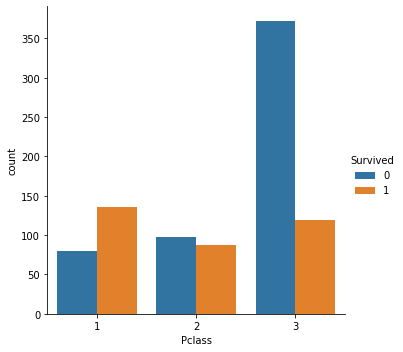

In [8]:
sns.catplot(x = "Pclass", data=train_filled, kind='count', hue="Survived")
#мужчины погибали чаще женщин

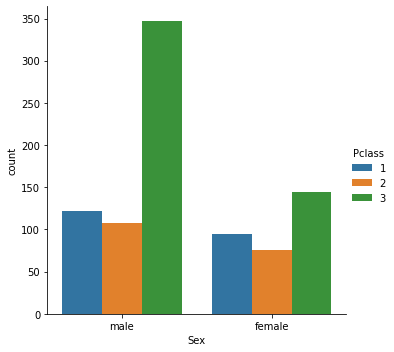

In [9]:
sns.catplot(x = "Sex", data=train_filled, kind='count', hue="Pclass")
#больше всего людей было в 3 классе, при этом мужчин в 3 классе было гораздо больше, чем женщин
#мужчин в первом и втором классах незначительно больше, чем женщин в соответствующих классах
#людей во втором классе меньше всего


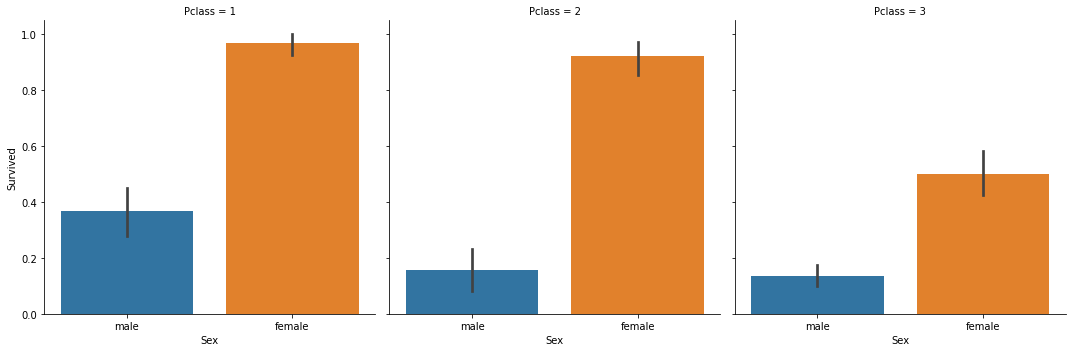

In [10]:
sns.catplot(x = "Sex", y="Survived", col="Pclass", data=train_filled, kind='bar')
#среди бедных мужчин меньше всего выживших

Feature Engineering

In [11]:
train_filled["Family"] = train_filled.SibSp + train_filled.Parch
test_filled["Family"] = test_filled.SibSp + test_filled.Parch
train_filled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 101.9+ KB


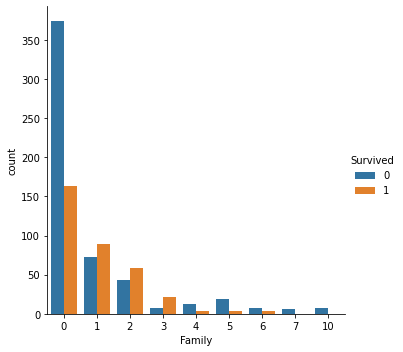

In [12]:
sns.catplot(x = "Family", data=train_filled, kind='count', hue="Survived")
# Количество родственников влияет на выживаемость: если родственников от 1 до 3, то выше шансы выжить

Сохранение обработанных данных

In [13]:
train_filled.to_csv("train_data.csv")
test_filled.to_csv("test_data.csv")

Гипотеза: мужчины из третьего класса погибают

In [14]:
test_filled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,0
893,3,female,47.0,1,0,7.0000,S,1
894,2,male,62.0,0,0,9.6875,Q,0
895,3,male,27.0,0,0,8.6625,S,0
896,3,female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...
1305,3,male,27.0,0,0,8.0500,S,0
1306,1,female,39.0,0,0,108.9000,C,0
1307,3,male,38.5,0,0,7.2500,S,0


In [15]:
prediction = (~((test_filled.Sex == "male") & (test_filled.Pclass == 3))).astype(int).values

Оформление результов

In [16]:
#функция для составления submission-файла соревнования

def make_prediction_file(prediction, test_data, name):
    
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})  
    result.to_csv(name, index=False)

In [17]:
make_prediction_file(prediction, test_filled, "test_predicted.csv")